In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
import pandas as pd 
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load dataset
IMDB_reviews_df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print("Dataset loaded. Preview:")
IMDB_reviews_df.head()

Dataset loaded. Preview:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
def cleaned_review(text_):
    text_ = text_.lower()
    text_ = re.sub(r'[^\w\s]', '', text_)
    tokens = text_.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return ' '.join(tokens)

IMDB_reviews_df['cleaned_review'] =IMDB_reviews_df['review'].apply(cleaned_review)
IMDB_reviews_df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,reviewers mentioned watching just 1 oz episode...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [5]:
# TF-IDF Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(IMDB_reviews_df['cleaned_review'])

y = IMDB_reviews_df['sentiment']

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Training the Model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



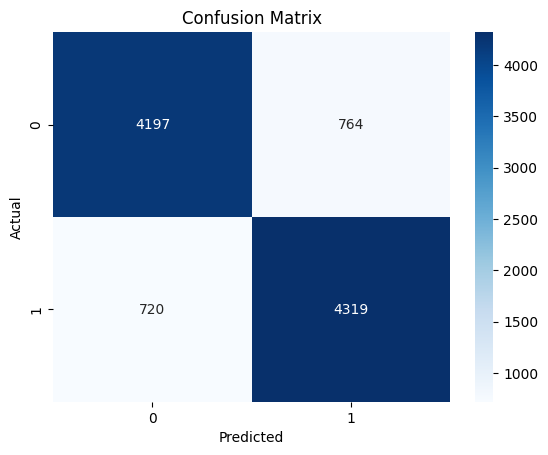

In [8]:
# Evaluation
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()